Confidence:- 0.9371282222410215


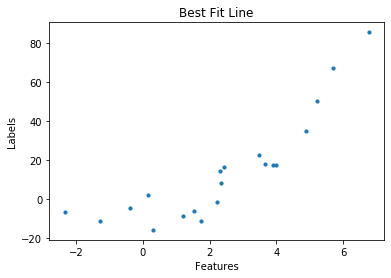

In [3]:
# Program for implementing the Polynomial Regression using numpy

import numpy as np
from matplotlib import pyplot as plt

def sum_of_squares(y1, y2, mean=False):
    S = 0
    if mean:
        for i in range(np.size(y1)):
            diff_square = (y1[0][i] - y2) ** 2
            S += diff_square
        return S
    else:
        for i in range(np.size(y1)):
            diff_square = (y1[0][i] - y2[0][i]) ** 2
            S += diff_square
        return S

class Poly:

    def __init__(self, frames, degree = 2):
        self.degree = degree
        self.frames = frames
        self.w = np.zeros([frames, 1])

    def prepare_X(self, X):
        _X = np.array([np.ones(self.frames)])
        for degree in range(1, self.degree + 1):
            X_ = X ** degree
            _X = np.append(_X, X_, axis=0)
        _X = _X.T
        return _X

    def fit(self, X, y):
        _y = y.T
        _X = self.prepare_X(X)
        #print(_X.shape)
        #print(_X.T.shape)

        XTX = np.linalg.inv((np.dot(_X.T, _X)))

        self.w = np.dot(XTX, np.dot(_X.T, _y))
        #print(self.w)

    def predict(self, X):
        _X = self.prepare_X(X)
        return np.dot(_X, self.w)

    def score(self, X, y):
        y_pred = self.predict(X).T
        SS_res = sum_of_squares(y, y_pred)
        SS_tot = sum_of_squares(y, np.mean(y), True)
        R2 = 1.0 - (SS_res / SS_tot)
        return R2

# Function to generate data for the model
def generate_data(mean, var, frames):
    return 2.0 - 3.0 * np.random.normal(mean, var, frames)

# Function to scatter plot the data points
def scatter(X, y):
    plt.scatter(X, y, s=10)
    plt.xlabel('Features')
    plt.ylabel('Labels')
    plt.title('X y Scatter Plot')
    plt.show()

# Function to plot the best fit line
def plot_best_fit_line(X, y, y_pred):
    plt.scatter(X, y, s=10)
    plt.plot(X, y_pred, c='r')    # Error, does not show plot for some reason
    plt.xlabel('Features')
    plt.ylabel('Labels')
    plt.title('Best Fit Line')
    plt.show()

# Initialising the mean and variance for normal distribution (for generate_data function)
# Standard Normal (mean = 0, variance = 1)
mean = 0
var = 1
FRAMES = 20
# Making the data
X = np.array([generate_data(mean, var, FRAMES)])
y = 1.0 + (2.0 * X**2) + np.random.normal(-10, 10, FRAMES)

# scatter(X, y)
poly = Poly(FRAMES, degree=2)
poly.fit(X, y)
y_pred = poly.predict(X).T
confidence = poly.score(X, y)
print('Confidence:- {}'.format(confidence))

plot_best_fit_line(X, y, y_pred)